# Задание 4 Вариант 5

In [14]:
import math
import matplotlib.pyplot as plt

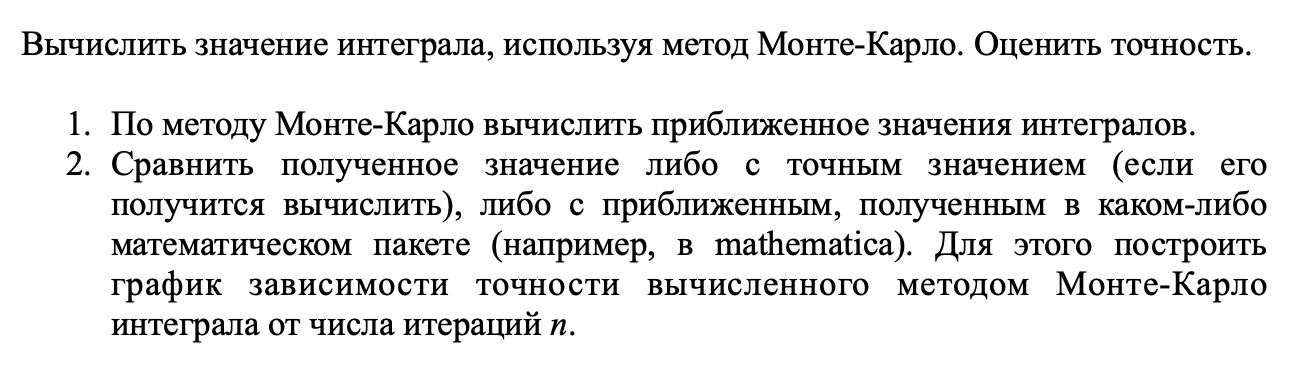

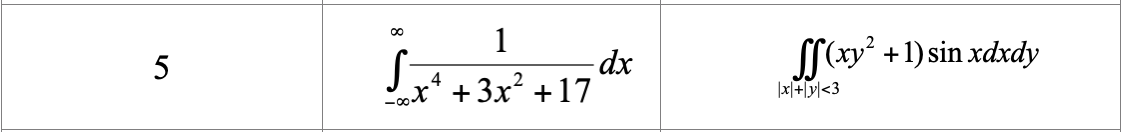

# Теория

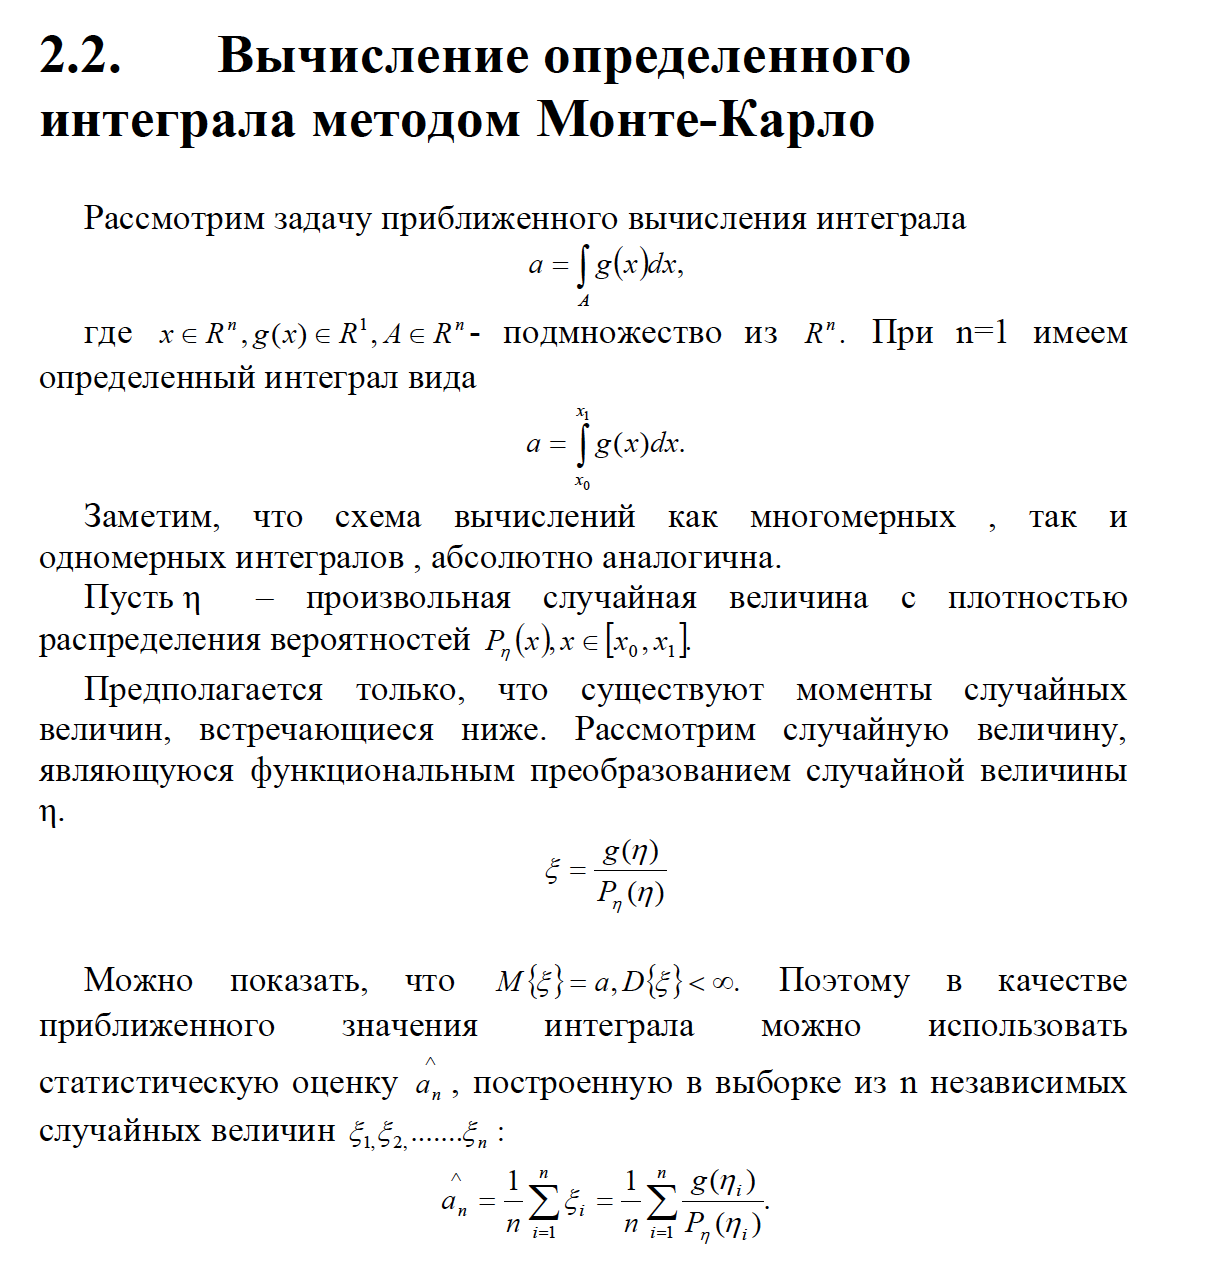

# Utils

In [11]:
n=1000

In [12]:
def get_values(n, generator):
    values=[]
    for i in range(n):
        values.append(next(generator))
    return values

In [81]:
def calc_integral(g,p,n,generator,verbose=True):
    statistic=0.0
    results=[]
    gen_values=get_values(n,generator)
    for i in range(n):
        statistic+=g(gen_values[i])/p(gen_values[i])
        results.append(statistic/(i+1))  
    if(verbose):
        plt.plot([i+1 for i in range(n)],results,'-')
    return results[-1]

# Multiplicative Congruential Generator

In [5]:
def random_MCG(a,b,m):
    while True:
        a=(b*a)%m
        yield a/m

In [8]:
a1=262147
b1=262147
a2=131075
b2=131075
m=math.pow(2,31)

In [9]:
MCG1=random_MCG(a1,b1,m)
MCG2=random_MCG(a2,b2,m)

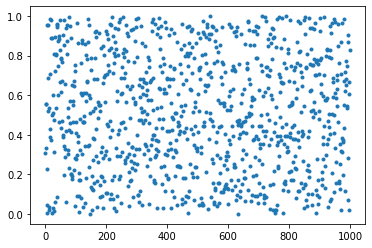

In [15]:
values_MCG1=get_values(n,MCG1)
plt.plot([i for i in range(n)],values_MCG1,'.')

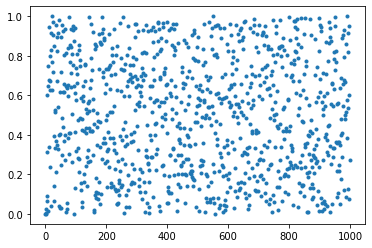

In [16]:
values_MCG2=get_values(n,MCG2)
plt.plot([i for i in range(n)],values_MCG2,'.')

# Normal Distribution

In [17]:
me=0
std=1

In [18]:
def random_ND(MCG1,MCG2,me,std):
    while True:
        mcg1=get_values(1,MCG1)[0]
        mcg2=get_values(1,MCG2)[0]
        nd=math.sqrt(-2*math.log(mcg1))*math.cos(2*math.pi*mcg2)
        yield me+std*nd

In [19]:
ND=random_ND(MCG1,MCG2,me,std)

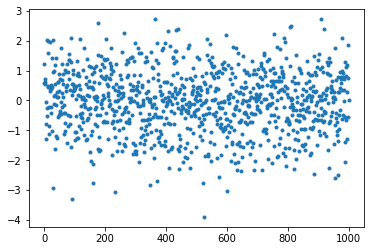

In [30]:
values_ND=get_values(n,ND)
plt.plot([i for i in range(n)],values_ND,'.')

https://homepage.divms.uiowa.edu/~mbognar/applets/normal.html

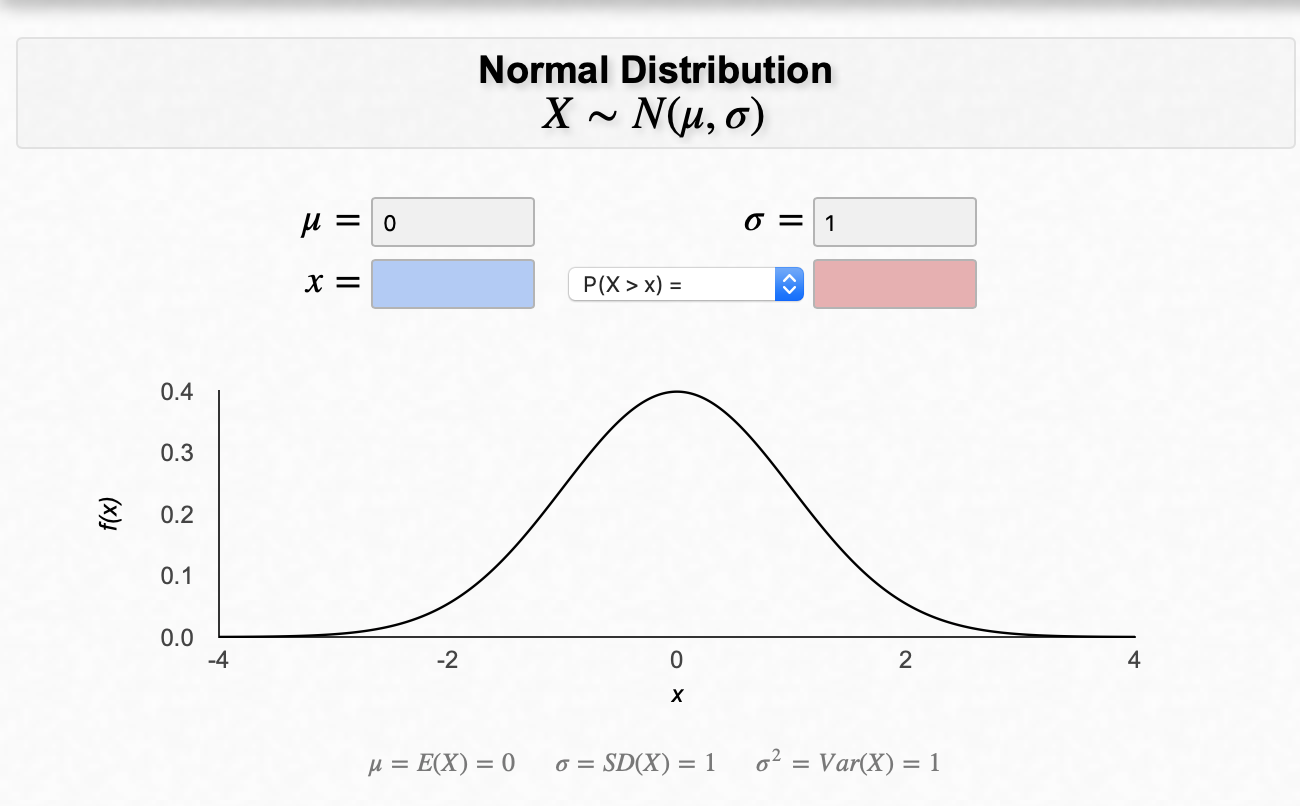

In [21]:
def teor_prob_func(x):
    den=(std*math.sqrt(2*math.pi))
    num=math.exp(-math.pow((x-me)/std,2)/2)
    return num/den

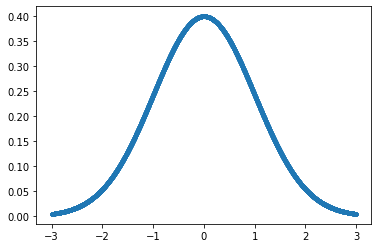

In [24]:
a_min=-3*std
a_plus=3*std
plt.plot([i/n for i in range(a_min*n,a_plus*n)],[teor_prob_func(i/n) for i in range(a_min*n,a_plus*n)],'.')

# I1

https://www.wolframalpha.com/input/?i=∫1%2F%28x%5E4%2B3*x%5E2%2B17%29dx+from+-∞+to+%2B∞

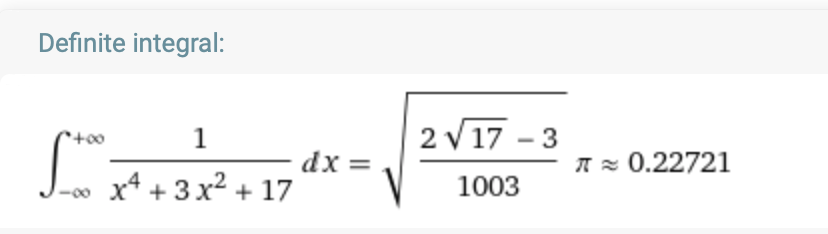

In [77]:
def g(x):
    return 1.0/(x**4+3*x**2+17)

In [78]:
g(1.0)

0.047619047619047616

0.22607527920725928

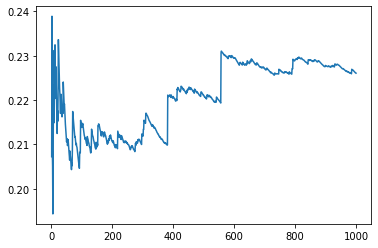

In [80]:
calc_integral(g,teor_prob_func,n,ND)

# I2 Preparation

In [140]:
def g(x,y):
    return (x*y**2+1)*math.sin(x)

In [141]:
g(1.0,1.0)

1.682941969615793

In [142]:
bound=3

# Uniform 

In [143]:
a=-bound
b=bound

In [144]:
def random_U(MCG,a,b):
    while True:
        mcg=get_values(1,MCG)[0]
        yield (b-a)*mcg+a

In [145]:
U=random_U(MCG1,a,b)

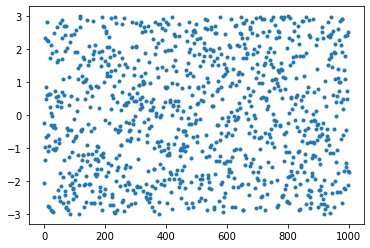

In [146]:
values_U=get_values(n,U)
plt.plot([i for i in range(n)],values_U,'.')

# I2

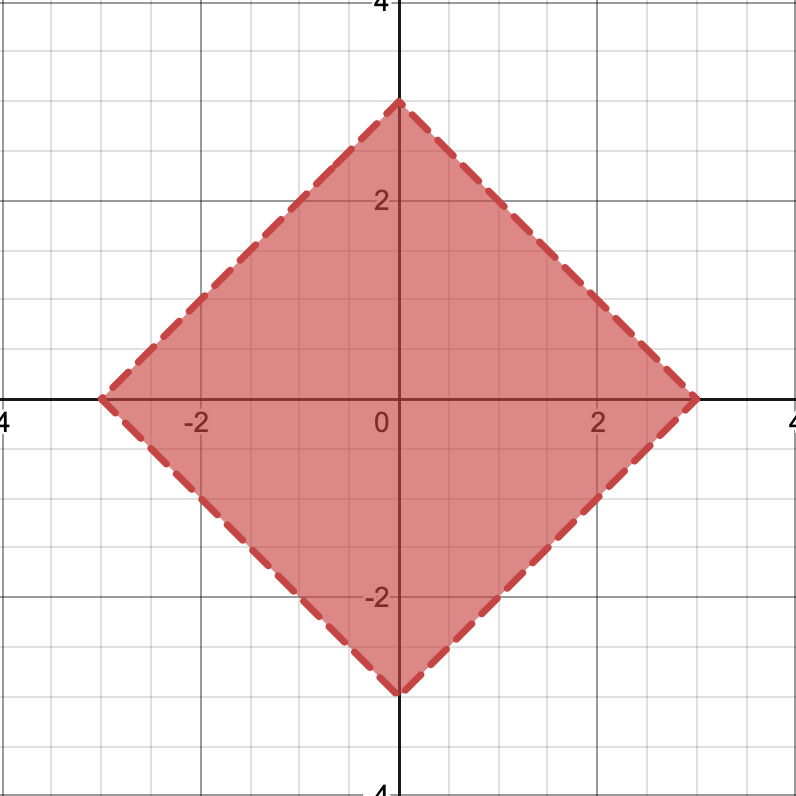

In [147]:
def isin(x,y):
    return abs(x)+abs(y)<bound

In [148]:
def get_area_square():
    return 2*bound*bound

In [149]:
def get_pair_from_area():
    while True:
        _x=get_values(1,U)[0]
        _y=get_values(1,U)[0]
        if(isin(_x,_y)):
            break
    return (_x,_y)

In [219]:
def calc_integral_2d(g,n,verbose=True):
    statistic=0.0
    results=[]
    p=1/get_area_square()
    for i in range(n):
        _x,_y=get_pair_from_area()
        statistic+=g(_x,_y)/p
        results.append(statistic/(i+1))  
    if(verbose):
        plt.plot([i+1 for i in range(n)],results,'-')
    return results[-1]

11.486521103128402

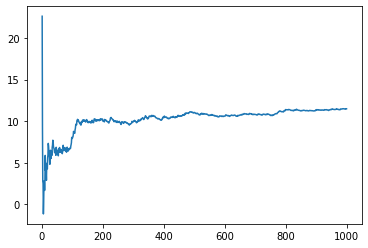

In [220]:
calc_integral_2d(g,n)

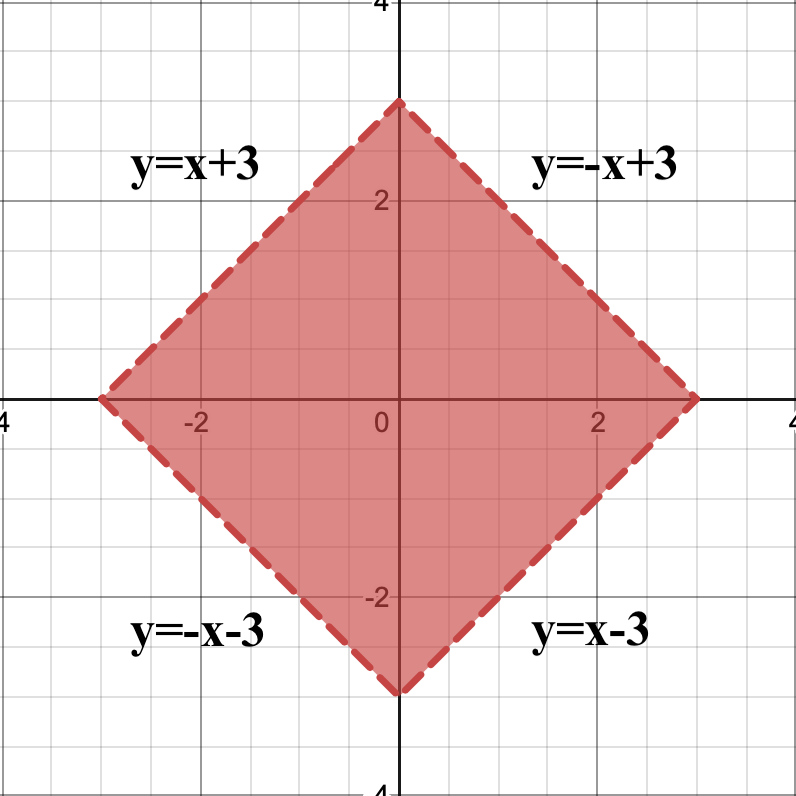

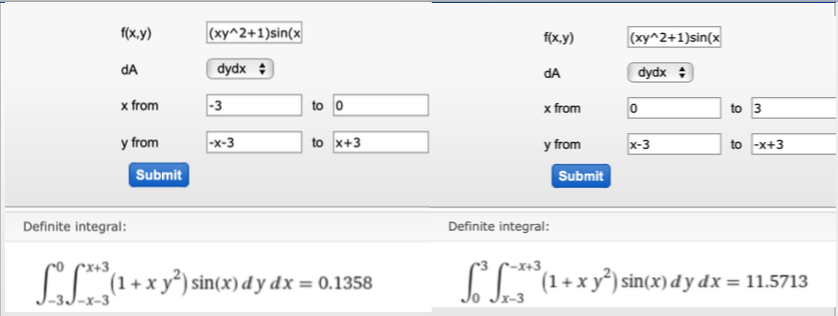

In [162]:
I2=0.1357+11.5713
print(I2)

11.707
